In [1]:
# Import library
import psycopg2

In [2]:
# Initiate a connection
try: 
    conn = psycopg2.connect("host=127.0.0.1 dbname=udacity user=postgres password=******")
except psycopg2.Error as e: 
    print("Error: Could not make connection to the Postgres database")
    print(e)
# Create a cursor for executing queries
try: 
    cur = conn.cursor()
except psycopg2.Error as e: 
    print("Error: Could not get curser to the Database")
    print(e)
# Set auto-commit option
conn.set_session(autocommit=True)

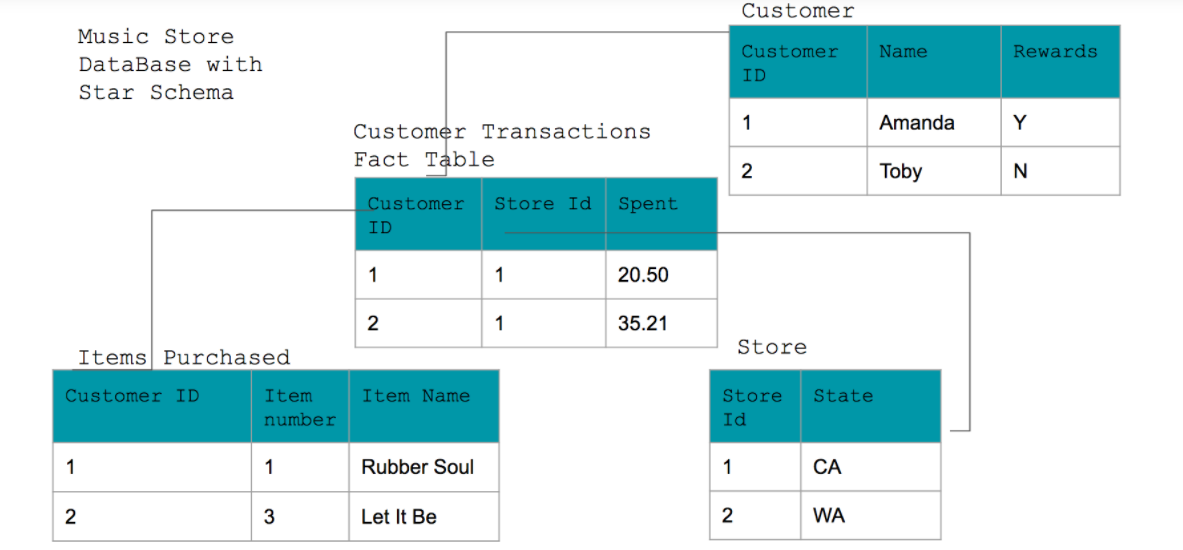

In [6]:
# Create the fact table(customer_transactions) and dimension tables(items_purchased, customer, store)

# Create fact table
try: 
    cur.execute('CREATE TABLE IF NOT EXISTS customer_transactions(customer_id int, store_id int, amount_spent numeric);')
except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)

# Create dimension tables
try: 
    cur.execute('CREATE TABLE IF NOT EXISTS items_purchased(customer_id int, item_number int, item_name varchar);')
except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)
    
try: 
    cur.execute('CREATE TABLE IF NOT EXISTS customer(customer_id int, customer_name varchar, rewards varchar);')
except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)

try: 
    cur.execute('CREATE TABLE IF NOT EXISTS store(store_id int, state varchar);')
except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)

In [7]:
# Insert data into fact table

data_tuple = ((1, 1, 20.50),
              (2, 1, 35.21)
)

try: 
    cur.executemany("INSERT INTO customer_transactions (customer_id, store_id, amount_spent) \
                 VALUES (%s, %s, %s)", data_tuple)
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)
    
# Insert data into dimension tables

data_tuple = ((1, 1, "Rubber Soul"),
              (2, 3, "Let It Be")
)

try: 
    cur.executemany("INSERT INTO items_purchased (customer_id, item_number, item_name) \
                 VALUES (%s, %s, %s)", data_tuple)
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)

data_tuple = ((1, "Amanda", True),
              (2, "Toby", False)
)

try: 
    cur.executemany("INSERT INTO customer (customer_id, customer_name, rewards) \
                 VALUES (%s, %s, %s)", data_tuple)
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)
    
data_tuple = ((1, "CA"),
              (2, "WA")
)

try: 
    cur.executemany("INSERT INTO store (store_id, state) \
                 VALUES (%s, %s)", data_tuple)
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)

`Query 1`: __Find all the customers that spent more than 30 dollars, who are they, what did they buy and if they are a rewards member__

In [9]:
try: 
    cur.execute("SELECT customer_name, item_name, rewards \
                 FROM customer_transactions AS C \
                     JOIN items_purchased AS I ON C.customer_id = I.customer_id \
                     JOIN customer AS CU ON C.customer_id = CU.customer_id \
                 WHERE C.amount_spent > 30;")
except psycopg2.Error as e: 
    print("Error: Executing query")
    print (e)
    
row = cur.fetchone()
while row:
    print(row)
    row = cur.fetchone()

('Toby', 'Let It Be', 'false')


`Query 2`: __Find all the customers that spent more than 30 dollars, who are they, which store they bought it from, location of the store, what they bought and if they are a rewards member__

In [11]:
try: 
    cur.execute("SELECT customer_name, S.store_id, state, item_name, rewards \
                 FROM customer_transactions AS C \
                     JOIN items_purchased AS I ON C.customer_id = I.customer_id \
                     JOIN customer AS CU ON C.customer_id = CU.customer_id \
                     JOIN store AS S ON C.store_id = S.store_id \
                 WHERE C.amount_spent > 30;")
except psycopg2.Error as e: 
    print("Error: Executing query")
    print (e)
    
row = cur.fetchone()
while row:
    print(row)
    row = cur.fetchone()

('Toby', 1, 'CA', 'Let It Be', 'false')


`Query 3`: __How much did Customer 2 spend__

In [13]:
try: 
    cur.execute("SELECT customer_id, amount_spent FROM customer_transactions WHERE customer_id = 2")
except psycopg2.Error as e: 
    print("Error: Executing query")
    print (e)
    
row = cur.fetchone()
while row:
    print(row)
    row = cur.fetchone()

(2, Decimal('35.21'))


In [14]:
try: 
    cur.execute("DROP table customer_transactions")
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)
try: 
    cur.execute("DROP table items_purchased")
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)
try: 
    cur.execute("DROP table customer")
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)
try: 
    cur.execute("DROP table store")
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)

In [15]:
cur.close()
conn.close()